# Feature Engineering 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from scipy import stats # statistical library
import math
import decimal
from datetime import datetime
import ppscore as pps
from sklearn.preprocessing import StandardScaler

from jupyterthemes import jtplot
jtplot.style()
%matplotlib inline
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 400

In [7]:
# Bring in data
path = '../thecap/Data/final.csv'
df = pd.read_csv(path, index_col='Date', parse_dates=True)
df = df.replace(to_replace=np.nan, method='bfill')
df.drop(columns=['Target','Target_1d'],inplace=True)
df.head()

,Close,vol%_chg1d,vol%_chg3d,vol%_chg8d,range,range%,JPY%,Close_JPY,btc_tweets,btc_activeaddresses,btc_mining_profitability,btc_transactionfees,btc_median_transaction_fee,btc_mediantransactionvalue,sub_growth_%chg,btc_gtrends,buybitcoin_gtrends,ETH_gtrends,crypto_gtrends
Date,,,,,,,,,,,,,,,,,,,
2017-12-31,15170.099609,0.160589,-0.227634,0.517258,1.163969,0.065188,0.000923,112.769997,64989,847972,2.281,25.170,15.291,2182.0,0.007039,48.214286,0.0,1.295976,6.291338
2018-01-01,15170.099609,0.160589,-0.227634,0.517258,1.163969,0.065188,0.000923,112.769997,62044,842391,2.174,26.274,14.625,2104.0,0.007324,46.428571,0.0,1.295976,6.291338
2018-01-02,15170.099609,0.160589,-0.227634,0.517258,1.163969,0.065188,0.000923,112.769997,77723,982159,2.431,26.522,12.574,3921.0,0.007731,53.571429,0.0,1.295976,10.485563
2018-01-03,15170.099609,0.160589,-0.227634,0.517258,1.163969,0.065188,-0.004664,112.244003,79086,953442,2.737,28.461,15.529,4847.0,0.008254,55.357143,0.0,2.591952,10.485563
2018-01-04,15170.099609,0.160589,-0.227634,0.517258,1.163969,0.065188,0.003234,112.607002,74534,1071574,2.606,27.264,15.519,5033.0,0.008228,53.571429,0.0,2.591952,14.679788


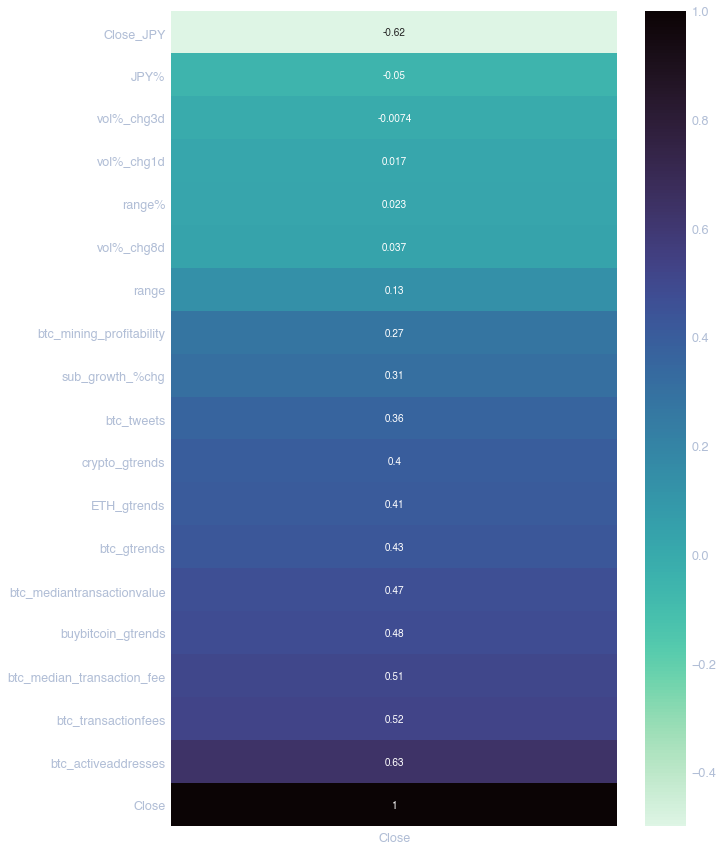

In [8]:
fig, ax = plt.subplots(figsize=(10,15))  

sns.heatmap(df.corr()[['Close']].sort_values('Close'),
            annot=True,vmin=-.5,vmax=1,cmap='mako_r',robust=True,ax=ax);

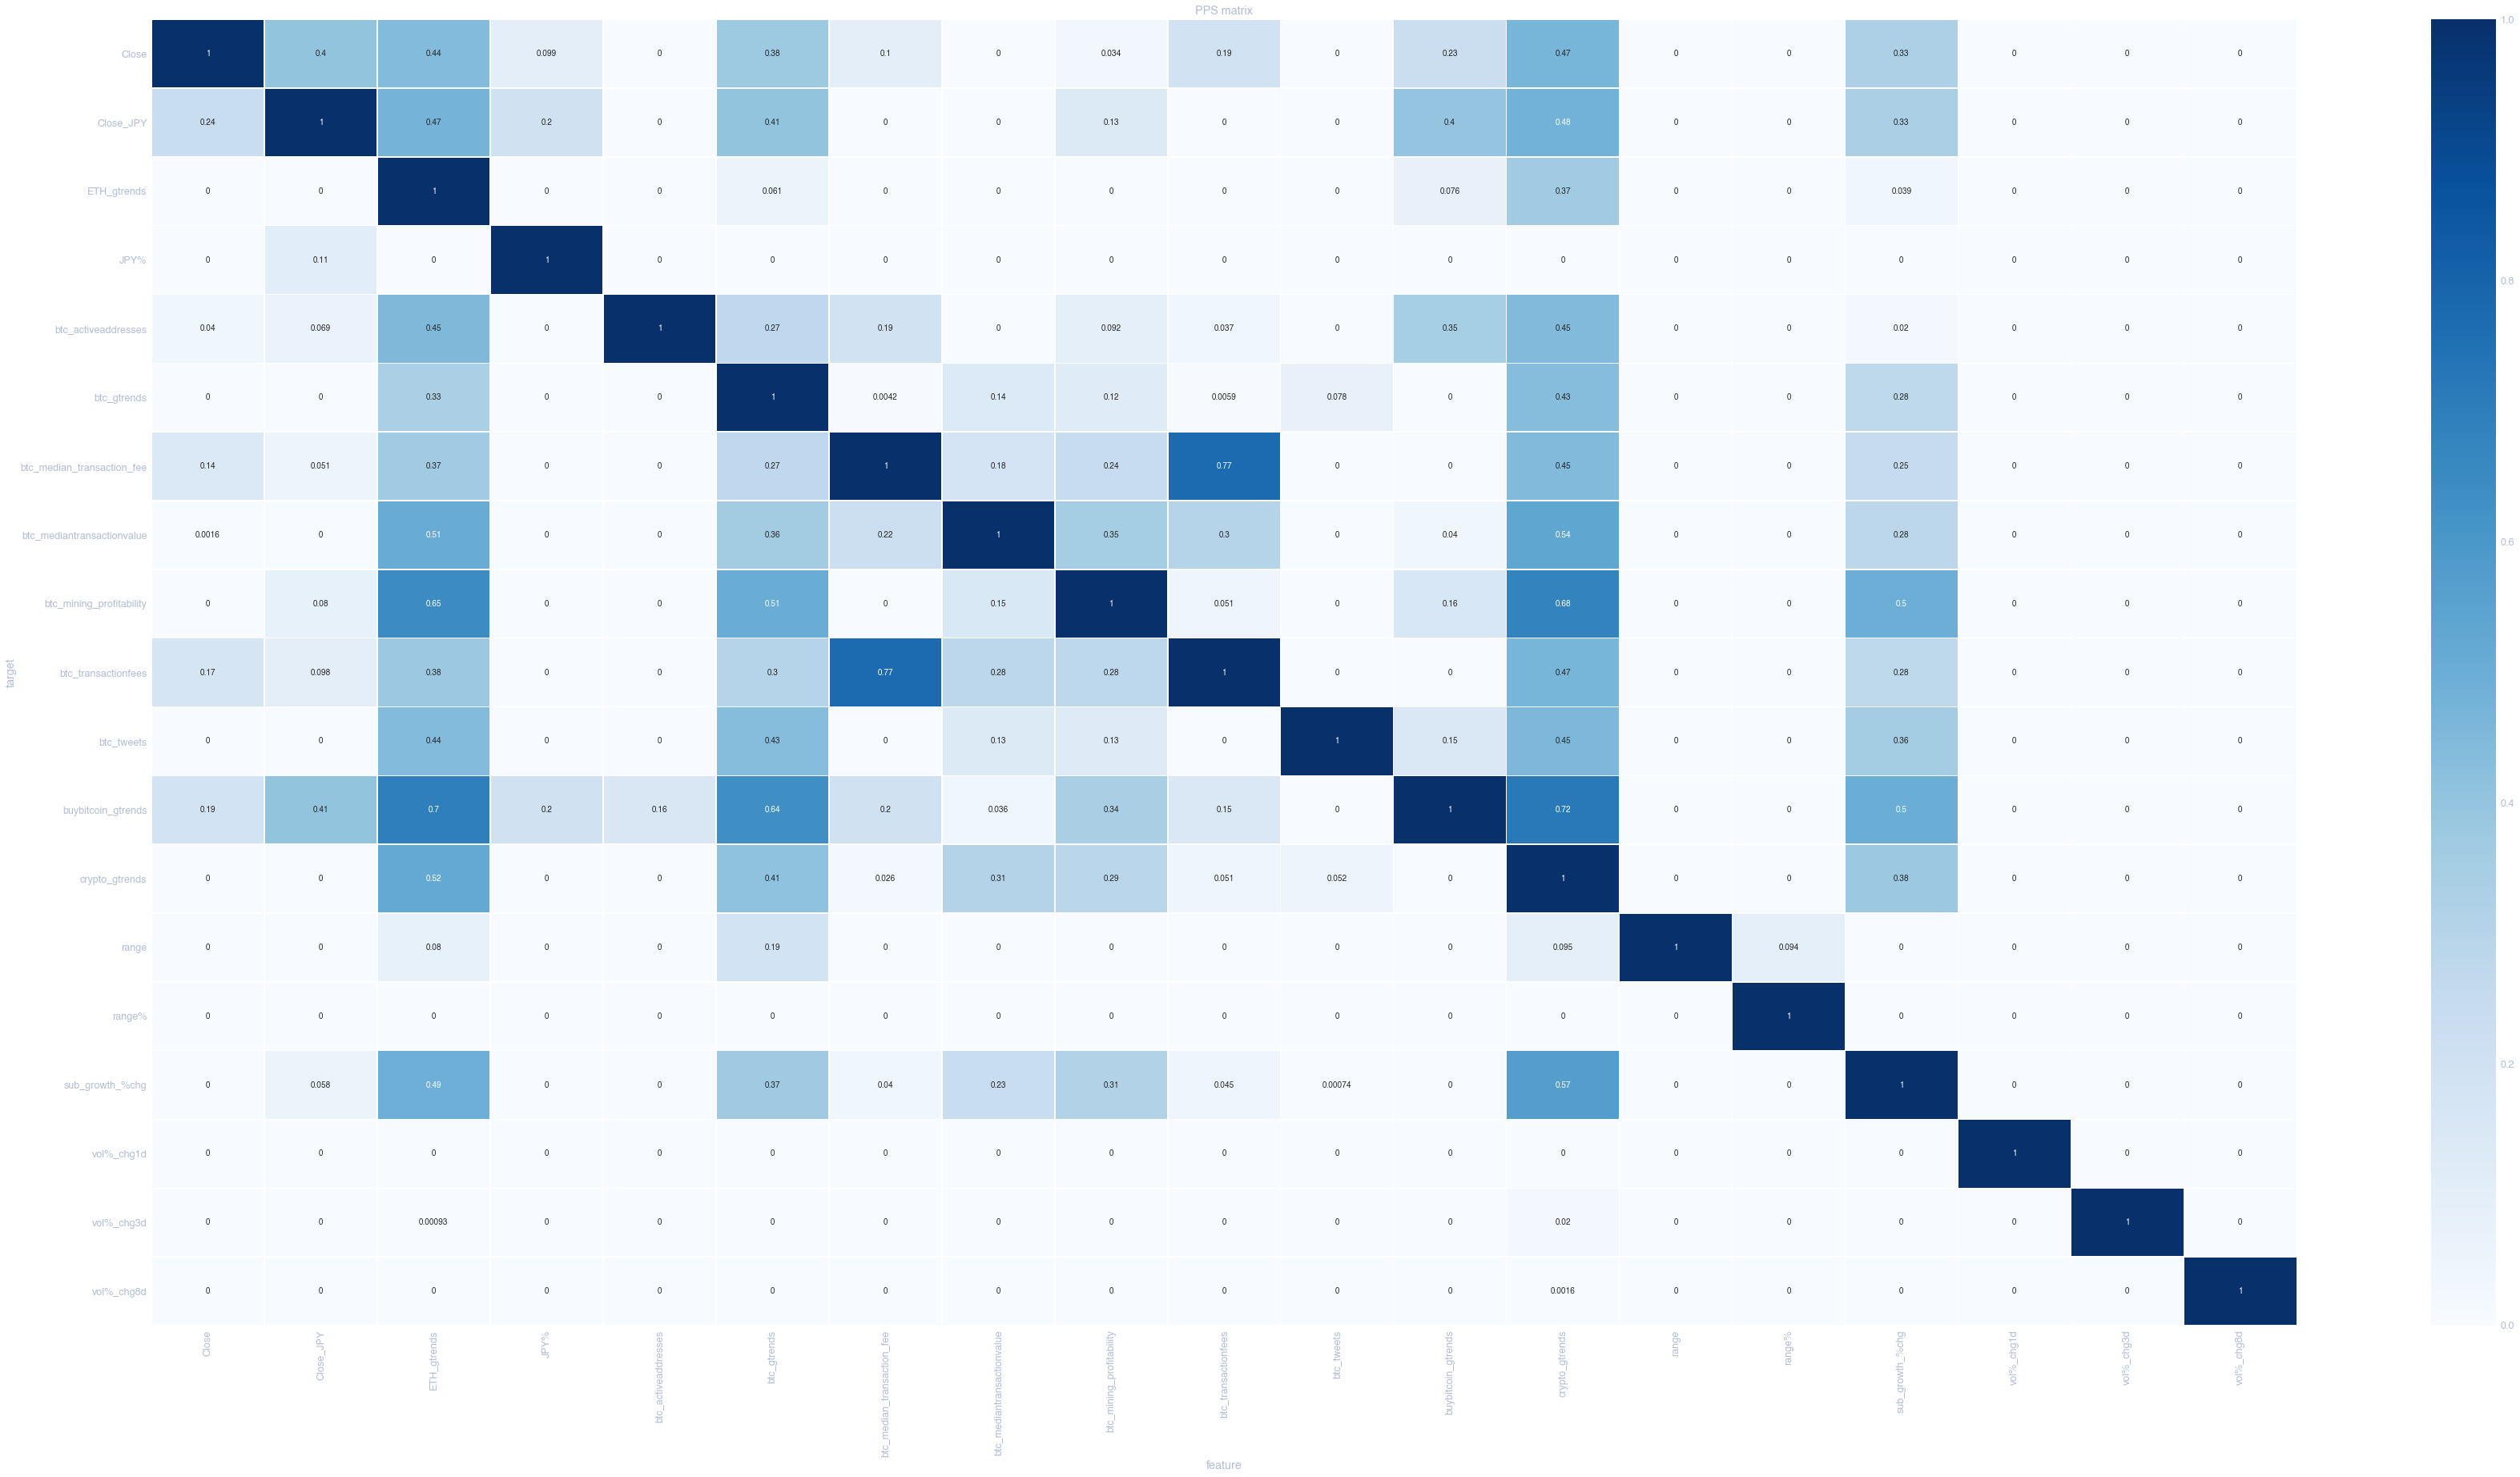

In [11]:


matrix = pps.matrix(df,random_seed=21)

def heatmap(df):
    df = df[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
    ax = sns.heatmap(df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
    ax.set_title("PPS matrix")
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
    return ax

def corr_heatmap(df):
    ax = sns.heatmap(df, vmin=-1, vmax=1, cmap="BrBG", linewidths=0.5, annot=True)
    ax.set_title("Correlation matrix")
    return ax

# Establish size of figure.
plt.figure(figsize = (60,30))
# Features on the X axis, Targets on the Y
heatmap(matrix);

In [12]:
df.columns

Index(['Close', 'vol%_chg1d', 'vol%_chg3d', 'vol%_chg8d', 'range', 'range%',
       'JPY%', 'Close_JPY', 'btc_tweets', 'btc_activeaddresses',
       'btc_mining_profitability', 'btc_transactionfees',
       'btc_median_transaction_fee', 'btc_mediantransactionvalue',
       'sub_growth_%chg', 'btc_gtrends', 'buybitcoin_gtrends', 'ETH_gtrends',
       'crypto_gtrends'],
      dtype='object')

In [13]:
techcols = ['Close','vol%_chg1d','vol%_chg3d','vol%_chg8d','range','range%',
            'JPY%','Close_JPY']

chaincols = ['Close','btc_activeaddresses','btc_mining_profitability','btc_transactionfees',
             'btc_mediantransactionvalue']

socialcols = ['Close','btc_tweets','sub_growth_%chg','btc_gtrends','buybitcoin_gtrends',
              'ETH_gtrends','crypto_gtrends']

df1 = df[techcols]
df2 = df[chaincols]
df3 = df[socialcols]

# Instantiate StandardScaler
ss1 = StandardScaler()
ss2 = StandardScaler()
ss3 = StandardScaler()

# Standardize.
df1_sc = ss1.fit_transform(df1)
df2_sc = ss2.fit_transform(df2)
df3_sc = ss3.fit_transform(df3)

In [14]:
technical = pd.DataFrame(df1_sc,columns=techcols)
technical.head(1)

,Close,vol%_chg1d,vol%_chg3d,vol%_chg8d,range,range%,JPY%,Close_JPY
0,2.347479,0.723166,-0.95102,1.440293,2.628269,1.631434,0.264254,1.628619


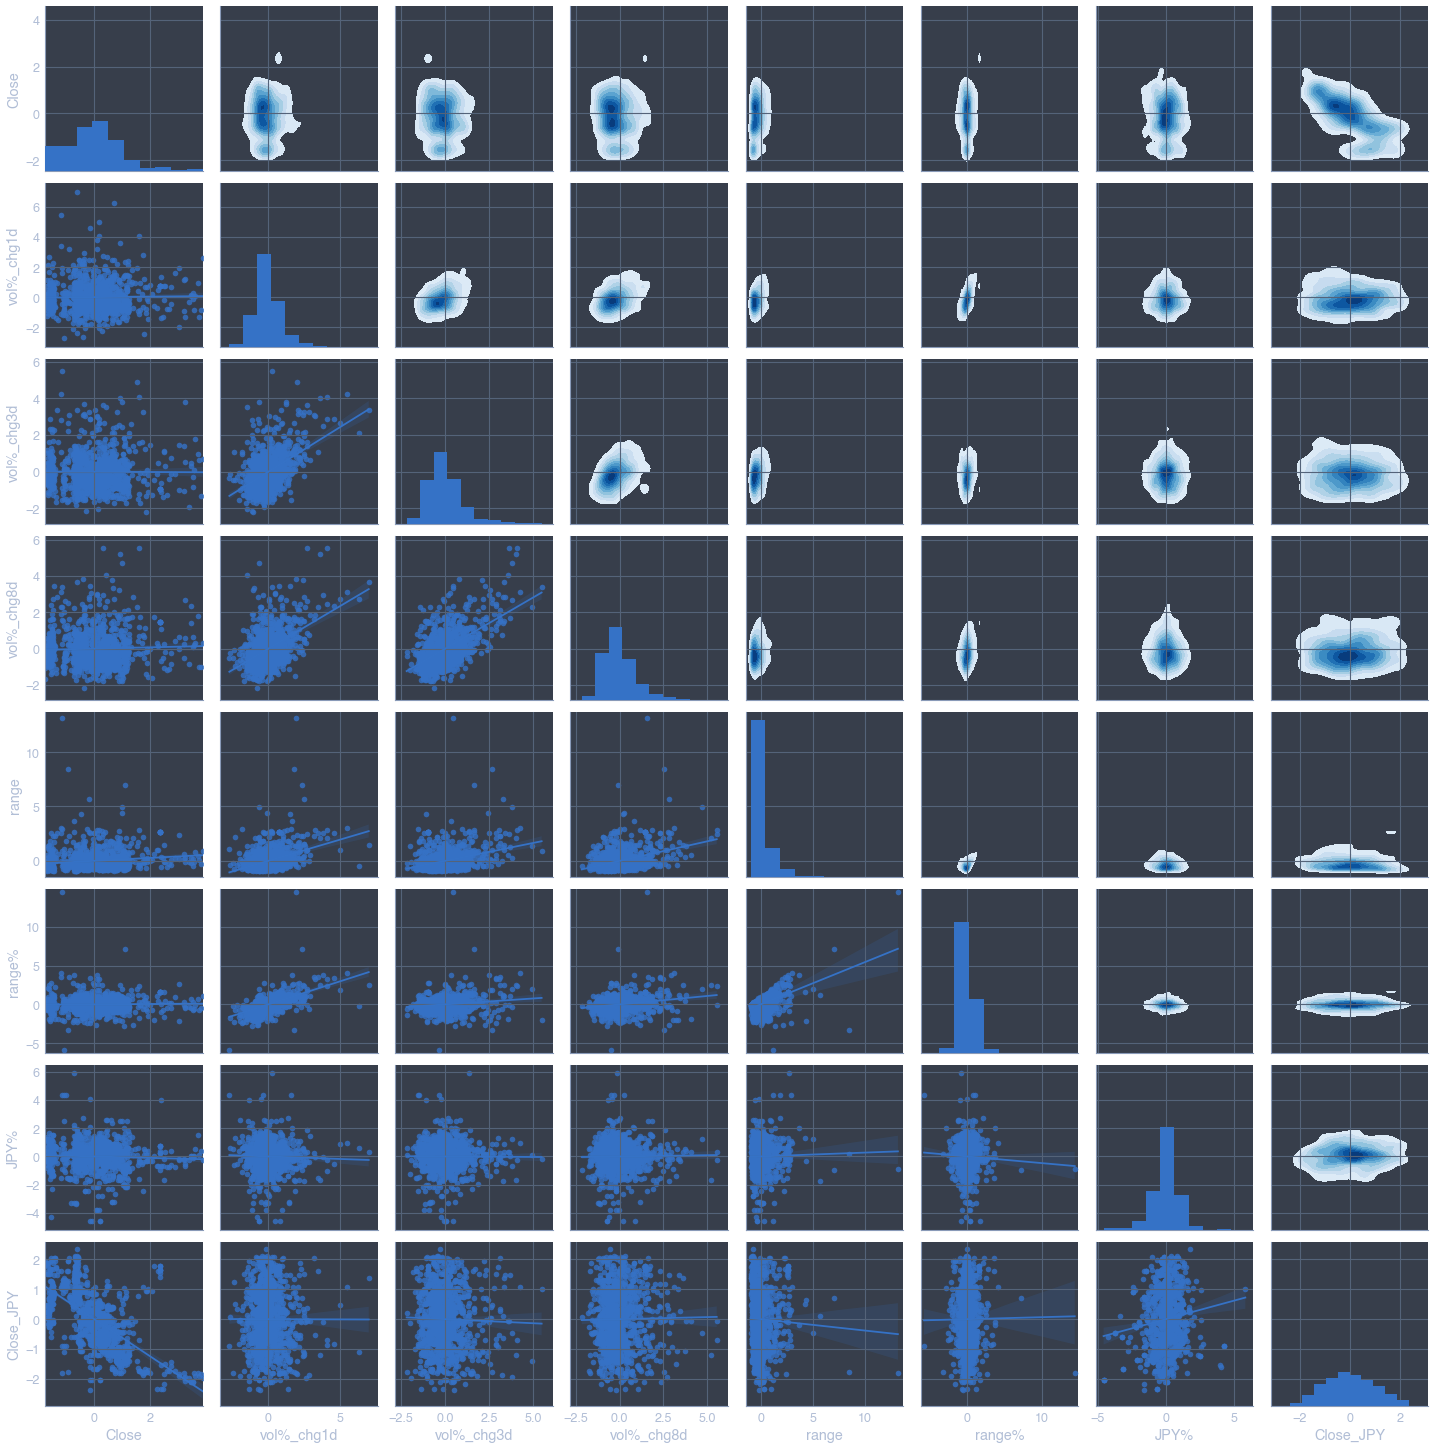

In [15]:
g = sns.PairGrid(technical)
g = g.map_lower(sns.regplot)    # Regression plots in lower triangle.
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)  # KDE plots in upper triangle.
g = g.map_diag(plt.hist)        # Histograms along diagonal.

plt.show()

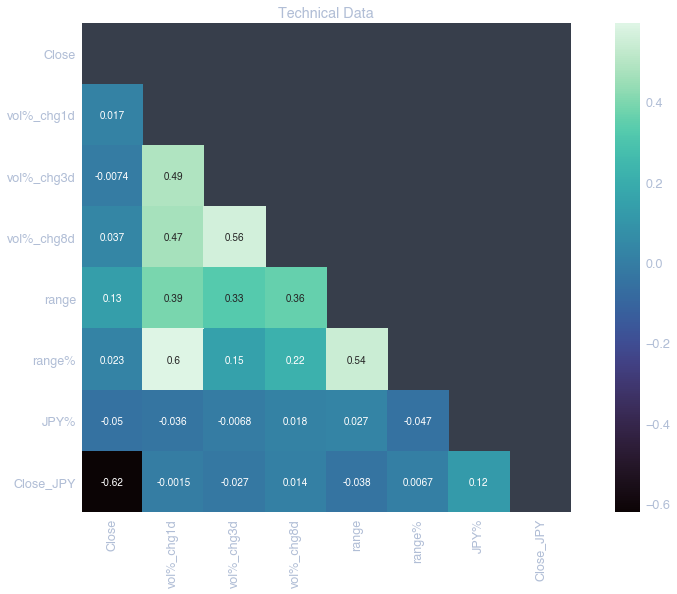

In [31]:
# A:# Establish size of figure.
plt.figure(figsize = (16,9))
plt.title('Technical Data')
# Get correlation of variables.
corr = technical.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
sns.heatmap(corr, mask = mask, square = True, cmap = 'mako', annot = True);

In [17]:
chainz = pd.DataFrame(df2_sc,columns=chaincols)
chainz.head(1)

,Close,btc_activeaddresses,btc_mining_profitability,btc_transactionfees,btc_mediantransactionvalue
0,2.347479,1.458968,5.619523,5.527457,3.595813


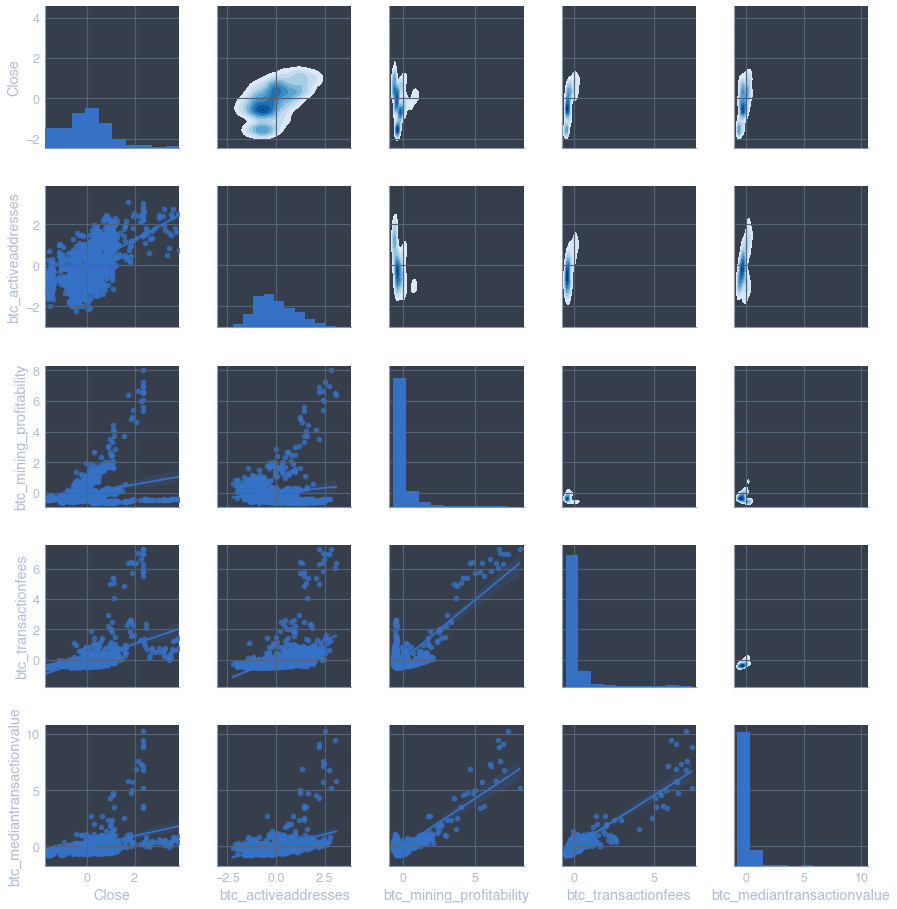

In [18]:
g = sns.PairGrid(chainz)
g = g.map_lower(sns.regplot)    # Regression plots in lower triangle.
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)  # KDE plots in upper triangle.
g = g.map_diag(plt.hist)        # Histograms along diagonal.

plt.show();

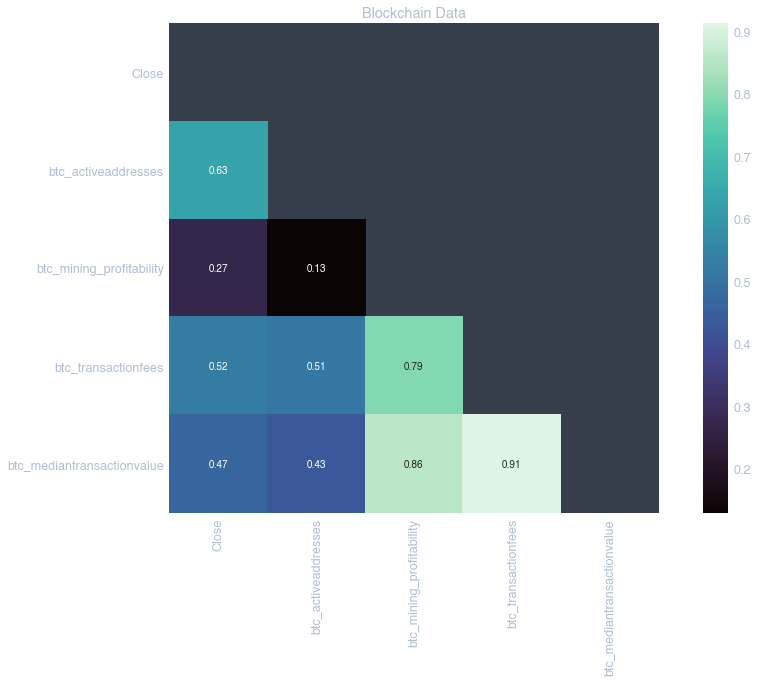

In [19]:
# A:# Establish size of figure.
plt.figure(figsize = (16,9))
plt.title('Blockchain Data')

# Get correlation of variables.
corr = chainz.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
sns.heatmap(corr, mask = mask, square = True, cmap = 'mako', annot = True);

In [20]:
social = pd.DataFrame(df3_sc,columns=socialcols)
social.head(1)

,Close,btc_tweets,sub_growth_%chg,btc_gtrends,buybitcoin_gtrends,ETH_gtrends,crypto_gtrends
0,2.347479,2.014919,4.680871,3.940254,-1.1444,0.892185,2.72019


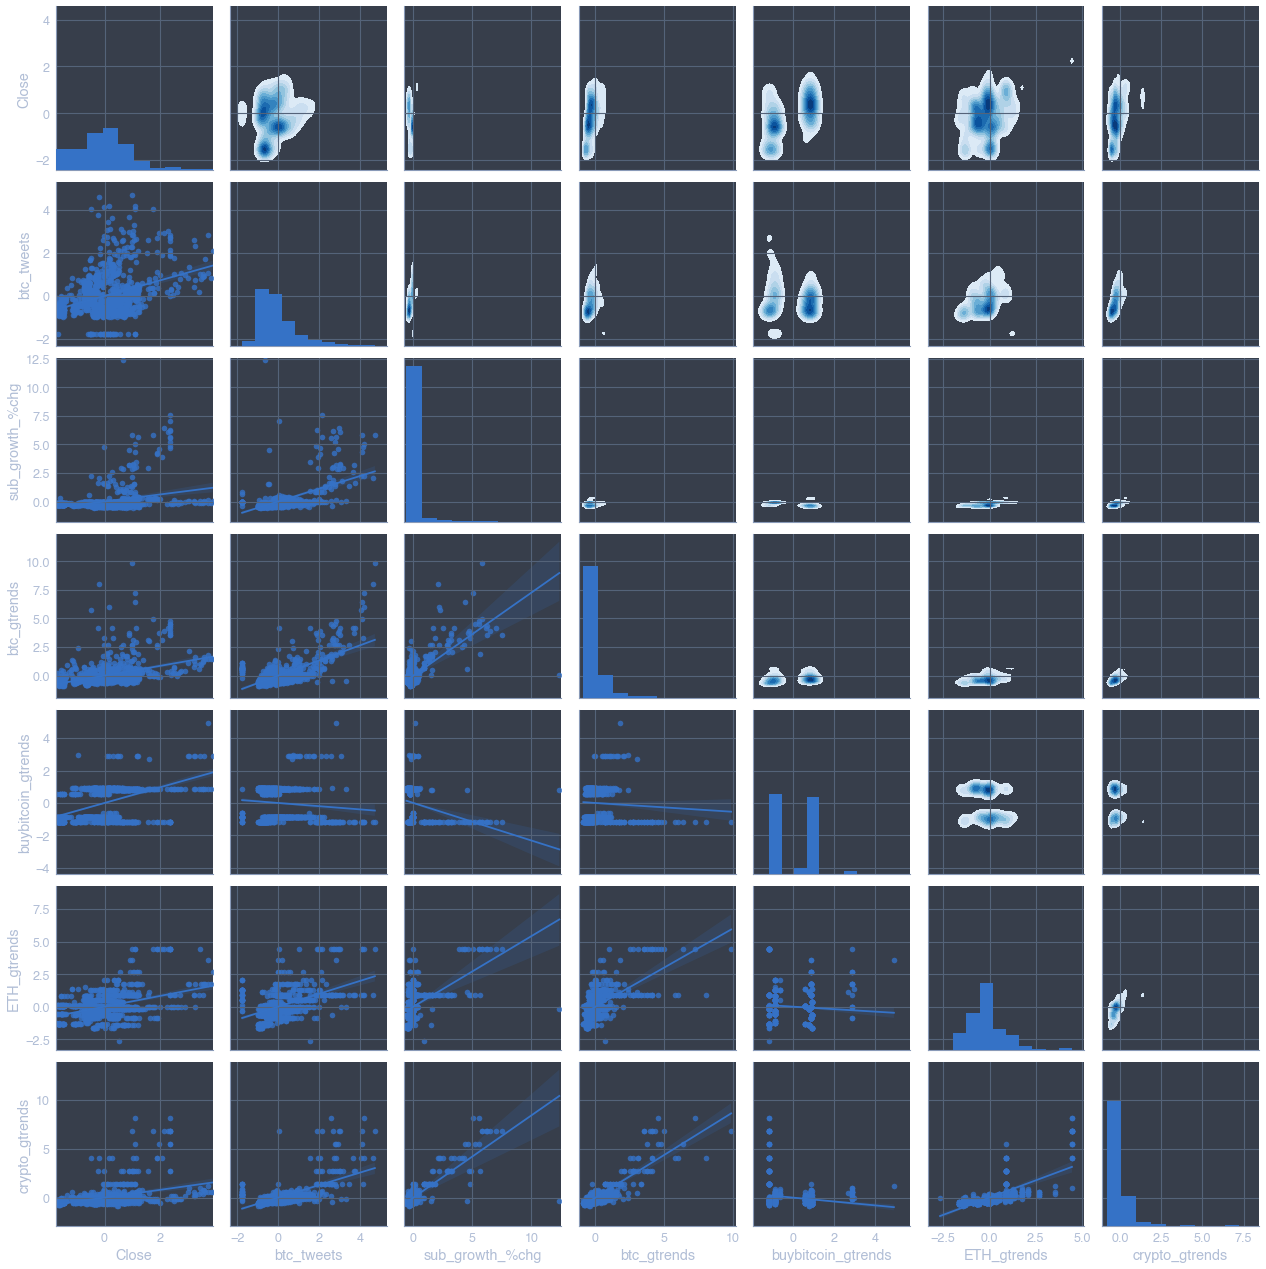

In [21]:
g = sns.PairGrid(social)
g = g.map_lower(sns.regplot)    # Regression plots in lower triangle.
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)  # KDE plots in upper triangle.
g = g.map_diag(plt.hist)        # Histograms along diagonal.

plt.show();

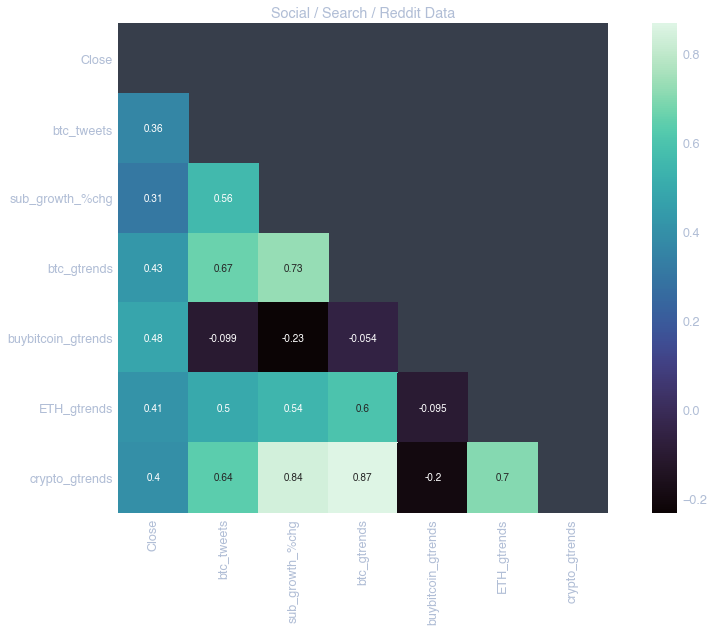

In [28]:
# A:# Establish size of figure.
plt.figure(figsize = (16,9))
plt.title('Social / Search / Reddit Data')
# Get correlation of variables.
corr = social.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
sns.heatmap(corr, mask = mask, square = True, cmap = 'mako', annot = True);